# <font color='#1a5276'> <b> <center> Differentiation </center> </b> </font>

## <font color='blue'>  Table of Contents </font>

1. [Introduction](#1)
2. [Setup](#2)
3. [Derivatives](#3)
4. [Partial derivatives](#4)
5. [References](#references)


<a name="1"></a>
## <font color='#2874a6'> 1. Introduction </font>

Autograd in PyTorch is an automatic differentiation library that allows you to compute gradients of tensors dynamically. It's the core feature enabling deep learning in PyTorch by automatically tracking operations and calculating derivatives.

When you define tensors with requires_grad=True, PyTorch tracks their operations in a computational graph. Calling .backward() on a scalar tensor computes gradients for all tensors in the graph.

<a name="2"></a>
## <font color='#2874a6'> 2. Setup </font>

In [88]:
import torch 
import matplotlib.pylab as plt
import numpy as np

In [25]:
import warnings
warnings.filterwarnings("ignore")

<a name="3"></a>
## <font color='#2874a6'> 3. Derivatives </font>

### Example 1

Let’s use a simple tensor and set the requires_grad parameter to true. This allows us to perform automatic differentiation and lets PyTorch evaluate the derivatives using the given value.

In [18]:
# create a tensor and set the requires_grad parameter in true
x = torch.tensor(2.0, requires_grad = True)

# print
print(f"x: {x}")

x: 2.0


Now, let's create a new tensor according to the equation $ y=x^2 $.

In [19]:
y = x ** 2
print(f"The result of y = x^2: {y}")

The result of y = x^2: 4.0


We will take the derivative with respect to x in x = 2:

(dy/dx = 2x)

In [20]:
y.backward()
print(f"The derivative at x = 2: {x.grad}")

The derivative at x = 2: 4.0


The previous line made:
    
$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x$

$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)=4$
    

In [23]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


### Interpretation of Tensor Properties

Let's break down the output describing the tensor:

- **`data: tensor(2.)`**:
  - This represents the value of the tensor, which is `2.0`. The `data` field holds the raw data value of the tensor.

- **`grad_fn: None`**:
  - `grad_fn` refers to the function that generated this tensor in the computation graph. Since it is `None`, this tensor is not the result of any operation sice it was created manually. It is a **leaf tensor** in the graph.

- **`grad: tensor(4.)`**:
  - This field indicates the gradient of the tensor with respect to some scalar loss after backpropagation. The gradient here is `4.0`.

- **`is_leaf: True`**:
  - This confirms that the tensor is a **leaf tensor**, meaning it was directly created by the user (e.g., using `torch.tensor` or `torch.nn.Parameter`), and not as a result of any operation.

- **`requires_grad: True`**:
  - This shows that the tensor is tracking gradients. Any operations involving this tensor will contribute to the computation graph, and the tensor will have its gradient computed during backpropagation.



In [26]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x703a7d01b2b0>
grad: None
is_leaf: False
requires_grad: True


### Example 2

Now, let's implement the following function:

$y=x^{2}+2x+1$

whose derivative is:

$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x+2$

and in x=2 is equal to:

$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)+2=6$


In [28]:
# Create a tensor x with the value 2.0, and enable gradient tracking by setting requires_grad=True
x = torch.tensor(2.0, requires_grad=True)

# Define the equation y = x^2 + 2x + 1
y = x ** 2 + 2 * x + 1

# Print the result of the equation
print(f"The result of y = x^2 + 2x + 1: {y}")

# Perform backpropagation to calculate the gradients
y.backward()

# Print the derivative (gradient) of y with respect to x at x = 2
print("The derivative at x = 2: ", x.grad)



The result of y = x^2 + 2x + 1: 9.0
The derivative at x = 2:  tensor(6.)


### Example 3

Now, let's calculate the derivative at various points:

In [29]:
# Define a function to calculate the derivative at various points
def calculate_derivative(points):
    for point in points:
        # Create a tensor x for each point with requires_grad=True
        x = torch.tensor(point, requires_grad=True)
        
        # Define the equation y = x^2 + 2x + 1
        y = x ** 2 + 2 * x + 1
        
        # Perform backpropagation to calculate the gradient
        y.backward()
        
        # Print the derivative (gradient) at the current point
        print(f"The derivative at x = {point}: {x.grad.item()}")

# List of points at which we want to calculate the derivative
points = [1.0, 2.0, 3.0, 4.0]

# Call the function to calculate derivatives at the specified points
calculate_derivative(points)


The derivative at x = 1.0: 4.0
The derivative at x = 2.0: 6.0
The derivative at x = 3.0: 8.0
The derivative at x = 4.0: 10.0


We can also do it with the sum trick:

- The **sum trick** refers to creating a scalar value from a tensor of values by summing them, and this scalar is often used as an objective function.
- Once you have this scalar, you can compute the **gradient** of the scalar with respect to the original tensor to guide optimization processes.

You can only compute partial derivatives for a scalar function. What `backward()` gives you is \( \frac{d \, \text{loss}}{d \, \text{parameter}} \), and you expect a single gradient value per parameter/variable. If your loss function were a vector-valued function (i.e., mapping from multiple inputs to multiple outputs), you would end up with multiple gradients per parameter/variable.


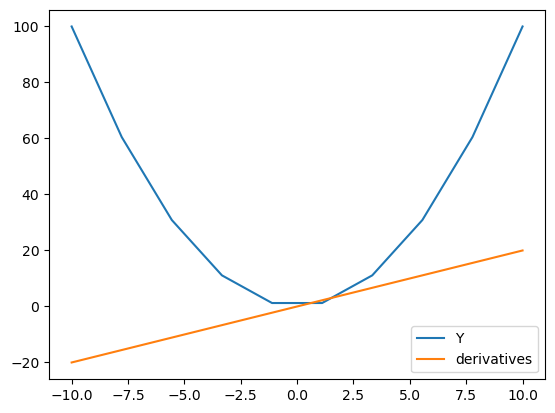

In [65]:
x = torch.linspace(-10.0,10.0,10, requires_grad=True)
Y = x**2
y = torch.sum(x**2)     
y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label="Y")
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label="derivatives")
plt.legend()

The detach() method prevents further tracking of operations on the tensor, meaning the subgraph won't record operations anymore. This allows the tensor to be converted to a NumPy array. To understand the sum operation, click here.

Let's see the analyze the previous code in more detail:

In [73]:
x = torch.linspace(-10.0,10.0,10, requires_grad=True)
print(x), print(x.shape)

tensor([-10.0000,  -7.7778,  -5.5556,  -3.3333,  -1.1111,   1.1111,   3.3333,
          5.5556,   7.7778,  10.0000], requires_grad=True)
torch.Size([10])


(None, None)

In [74]:
Y = x**2
print(Y), print(Y.shape)

tensor([100.0000,  60.4938,  30.8642,  11.1111,   1.2346,   1.2346,  11.1111,
         30.8642,  60.4938, 100.0000], grad_fn=<PowBackward0>)
torch.Size([10])


(None, None)

In [75]:
y = torch.sum(x**2) 
print(y), print(y.shape)

tensor(407.4074, grad_fn=<SumBackward0>)
torch.Size([])


(None, None)

In [76]:
y.backward()

### Example 4 : ReLU

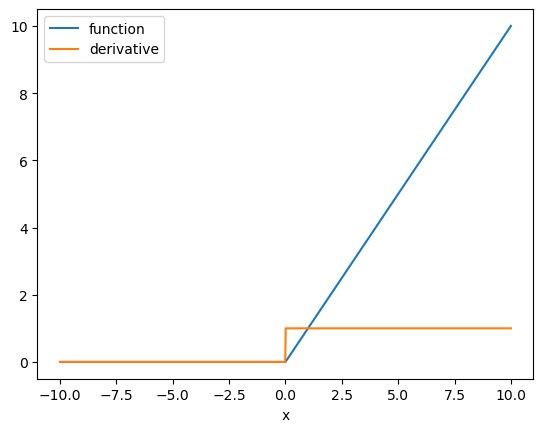

In [77]:
import torch
import matplotlib.pyplot as plt

# Create a tensor x with values from -10 to 10, requiring gradients
x = torch.linspace(-10, 10, 1000, requires_grad=True)

# Apply ReLU function to x
Y = torch.relu(x)

# Sum all values in Y to compute a scalar loss
y = Y.sum()

# Perform backpropagation to compute the gradients
y.backward()

# Plot the function and its derivative
plt.plot(x.detach().numpy(), Y.detach().numpy(), label='function')  # Plot ReLU function
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='derivative')  # Plot derivative (gradients)
plt.xlabel('x')
plt.legend()
plt.show()


The ReLU (Rectified Linear Unit) function is not differentiable at x = 0.

At x=0, the function has a "corner" where the gradient does not exist because the left and right derivatives are not equal. However, the function is differentiable everywhere else, and its derivative is 1 for positive values of 
𝑥
x and 0 for negative values. Despite this, ReLU is often used in practice, and its non-differentiability at zero is typically not problematic for optimization algorithms like gradient descent.

### Autograd Function

We can implement our custom autograd functions by subclassing torch.autograd.Function and implementing forward and backward passes that operate on tensors.

In [31]:
class SQ(torch.autograd.Function):

    @staticmethod
    def forward(ctx, i):
        """
        In the forward pass, we receive a tensor containing the input and return
        one that contains the output. ctx is a context object that can be used to store information
        for the backward pass. It can cache arbitrary objects to use in the backward pass
        using the ctx.save_for_backward method.
        """
        result = i ** 2 # it calculates i**2 (y = x^2)
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass, we receive a tensor that contains the gradient of the loss with respect 
        to the output, and we need to compute the gradient of the loss with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2 * i # this is the derivative of i**2 (y = x^2); y = 2*x
        return grad_output


**Key concepts**

- ctx (context object): This is a special object passed between the forward and backward methods. It allows you to save any necessary data (like the input tensor) to be used during backpropagation.

- ctx.save_for_backward: This method saves tensors to the context object so they can be accessed later in the backward pass.

- Backward pass: This method calculates the gradients of the loss function with respect to the inputs, based on the chain rule.

In [35]:
# Create a tensor x with the value 3.0, and enable gradient tracking by setting requires_grad=True
x = torch.tensor(3.0, requires_grad=True)

# Assign the custom autograd function SQ to the variable 'sq'
sq = SQ.apply

# Apply the custom function SQ to the input tensor x
y = sq(x)

# Print the gradient function associated with the output tensor y
# This shows that y is the result of applying the custom autograd function SQ
print(y.grad_fn)

# Perform backpropagation to calculate the gradients of the loss with respect to the input tensor x
y.backward()

# Print the gradient of the loss with respect to x
# This is the derivative of y = x^2 at x = 3, which should be 2 * 3 = 6
x.grad

tensor(6.)

<a name="4"></a>
## <font color='#2874a6'> 4. Partial derivatives </font>

### Example 1

Consider the function:

$f(u,v)=vu+u^{2}$

Its partial derivatives with respect to u and v are:

$\frac{\mathrm{\partial f(u,v)}}{\partial {u}}=v+2u$

$\frac{\mathrm{\partial f(u,v)}}{\partial {v}}=u$




In [61]:
# Create tensor u with the value 1.0 and enable gradient tracking
u = torch.tensor(1.0, requires_grad=True)

# Create tensor v with the value 2.0 and enable gradient tracking
v = torch.tensor(2.0, requires_grad=True)

# Define the function f = u * v + u^2
f = u * v + u ** 2

# Print the result of the equation v * u + u^2
# This computes the value of the function f at u=1 and v=2, which is 1*2 + 1^2 = 2 + 1 = 3
print(f"The result of v * u + u^2: {f}")


The result of v * u + u^2: 3.0


In [62]:
# Perform backpropagation to calculate the gradient
f.backward()

# Calculate the derivative with respect to u
print(f"The partial derivative with respect to u in ({u}, {v}): {u.grad}")

# Calculate the derivative with respect to v
print(f"The partial derivative with respect to v in ({u}, {v}): {v.grad}")

The partial derivative with respect to u in (1.0, 2.0): 4.0
The partial derivative with respect to v in (1.0, 2.0): 1.0


### Example 2

In [104]:
# Create a 1D tensor with values from 0 to 4
u = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)

# create another tensor
v = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)

# f
f = u**2 + 2*v

In [105]:
# compute gradients
f.sum().backward()

In [106]:
# partial derivatives
df_du = u.grad
df_dv = v.grad

In [107]:
# Convert tensors to numpy arrays using detach()
f = f.detach().numpy()
df_du = df_du.detach().numpy()
df_dv = df_dv.detach().numpy()

In [152]:
u, v, df_du

(tensor([1., 2., 3., 4.], requires_grad=True),
 tensor([1., 2., 3., 4.], requires_grad=True),
 array([2., 4., 6., 8.], dtype=float32))

In [153]:
u, v, df_dv

(tensor([1., 2., 3., 4.], requires_grad=True),
 tensor([1., 2., 3., 4.], requires_grad=True),
 array([2., 2., 2., 2.], dtype=float32))

### Example 3

In [151]:
def compute_partial_derivatives(x_values, y_values):
  """Computes the partial derivatives of f(x, y) = x^2 + y^2 for given x and y values.

  Args:
    x_values: A list or tensor of x values.
    y_values: A list or tensor of y values.

  Returns:
    A tuple of two tensors:
      - Partial derivatives with respect to x.
      - Partial derivatives with respect to y.
  """

  # Convert input values to tensors with requires_grad=True
  x = torch.tensor(x_values, requires_grad=True)
  y = torch.tensor(y_values, requires_grad=True)

  # Compute the function value (a tensor)
  z = x**2 + y**2

  # Reduce the tensor to a scalar (e.g., by summing its elements)
  z = z.sum()

  # Compute gradients
  z.backward()

  # Return the partial derivatives
  return x.grad, y.grad

# Example usage:
x_values = [2.0, 3.0, 4.0]
y_values = [1.0, 2.0, 3.0]

dx, dy = compute_partial_derivatives(x_values, y_values)

print(f"Partial derivatives with respect to x: {dx}")
print(f"Partial derivatives with respect to x: {dy}")

Partial derivatives with respect to x: tensor([4., 6., 8.])
Partial derivatives with respect to x: tensor([2., 4., 6.])


### Example 4

In [158]:
def compute_partial_derivatives(x_values, y_values):
  """Computes the partial derivatives of f(x, y) = x^2 + y^2 for given x and y values.

  Args:
    x_values: A list or tensor of x values.
    y_values: A list or tensor of y values.

  Returns:
    A tuple of two tensors:
      - Partial derivatives with respect to x.
      - Partial derivatives with respect to y.
  """

  # Convert input values to tensors with requires_grad=True
  x = torch.tensor(x_values, requires_grad=True)
  y = torch.tensor(y_values, requires_grad=True)

  # Compute the function value (a tensor)
  z = x**2 + x*y + y**2

  # Reduce the tensor to a scalar (e.g., by summing its elements)
  z = z.sum()

  # Compute gradients
  z.backward()

  # Return the partial derivatives
  return x.grad, y.grad

# Example usage:
x_values = [2.0, 3.0, 4.0]
y_values = [1.0, 2.0, 3.0]

dx, dy = compute_partial_derivatives(x_values, y_values)

print(f"Partial derivatives with respect to x: {dx}  (2x+y)")
print(f"Partial derivatives with respect to x {y_values}: {dy} (2y + x)")

Partial derivatives with respect to x: tensor([ 5.,  8., 11.])  (2x+y)
Partial derivatives with respect to x [1.0, 2.0, 3.0]: tensor([ 4.,  7., 10.]) (2y + x)


Let's plot.

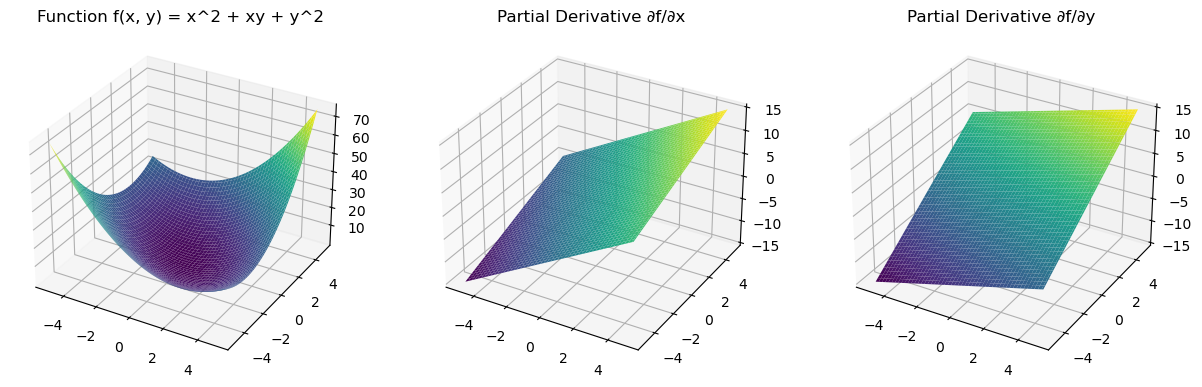

In [159]:
# Define the grid of x and y values
x_values = np.linspace(-5, 5, 100)
y_values = np.linspace(-5, 5, 100)

# Create mesh grid
X, Y = np.meshgrid(x_values, y_values)

# Convert to tensors
X_tensor = torch.tensor(X, requires_grad=True)
Y_tensor = torch.tensor(Y, requires_grad=True)

# Compute the function Z = f(x, y)
Z = X_tensor**2 + X_tensor*Y_tensor + Y_tensor**2

# Compute partial derivatives
dZ_dx, dZ_dy = compute_partial_derivatives(X.flatten(), Y.flatten())

# Reshape the gradients to match the mesh grid shape
dZ_dx = dZ_dx.detach().numpy().reshape(X.shape)
dZ_dy = dZ_dy.detach().numpy().reshape(Y.shape)

# Create plots
fig = plt.figure(figsize=(15, 5))

# Plot the original function f(x, y)
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(X, Y, Z.detach().numpy(), cmap='viridis')
ax1.set_title("Function f(x, y) = x^2 + xy + y^2")

# Plot the partial derivative with respect to x
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_surface(X, Y, dZ_dx, cmap='viridis')
ax2.set_title("Partial Derivative ∂f/∂x")

# Plot the partial derivative with respect to y
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(X, Y, dZ_dy, cmap='viridis')
ax3.set_title("Partial Derivative ∂f/∂y")

plt.show()


### Example 5

In [162]:
# Define tensors with requires_grad=True
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Define a function
z = x**2 + y**2 + 2*x*y

# Compute gradients
z.backward()

# Gradients
print(f"dz/dx: {x.grad}")  # Should be 2*x + 2*y
print(f"dz/dy: {y.grad}")  # Should be 2*y + 2*x


dz/dx: 10.0
dz/dy: 10.0


<a name="references"></a>
## <font color='#2874a6'> References </font>

[IBM AI Engineering Professional Certificate](https://www.coursera.org/professional-certificates/ai-engineer)
